In [41]:
# pip install -U seaborn

In [42]:
# pip install missingno

In [43]:
# pip install xgboost

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [45]:
pd.set_option('display.max_columns',None)
df = pd.read_csv("Cancer_Data.csv")
df.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
499,91485,M,20.59,21.24,137.8,1320.0,0.10850,0.1644,0.21880,0.11210,0.1848,0.06222,0.5904,1.2160,4.206,75.09,0.006666,0.02791,0.04062,0.014790,0.01117,0.003727,23.86,30.76,163.2,1760.0,0.1464,0.3597,0.5179,0.21130,0.2480,0.08999,NaN
430,907914,M,14.90,22.53,102.1,685.0,0.09947,0.2225,0.27330,0.09711,0.2041,0.06898,0.2530,0.8749,3.466,24.19,0.006965,0.06213,0.07926,0.022340,0.01499,0.005784,16.35,27.57,125.4,832.7,0.1419,0.7090,0.9019,0.24750,0.2866,0.11550,NaN
261,888264,M,17.35,23.06,111.0,933.1,0.08662,0.0629,0.02891,0.02837,0.1564,0.05307,0.4007,1.3170,2.577,44.41,0.005726,0.01106,0.01246,0.007671,0.01411,0.001578,19.85,31.47,128.2,1218.0,0.1240,0.1486,0.1211,0.08235,0.2452,0.06515,NaN


In [46]:
df.head(3).T

,0,1,2
id,842302,842517,84300903
diagnosis,M,M,M
radius_mean,17.99,20.57,19.69
texture_mean,10.38,17.77,21.25
perimeter_mean,122.8,132.9,130.0
area_mean,1001.0,1326.0,1203.0
smoothness_mean,0.1184,0.08474,0.1096
compactness_mean,0.2776,0.07864,0.1599
concavity_mean,0.3001,0.0869,0.1974
concave points_mean,0.1471,0.07017,0.1279


In [47]:
df.shape

(569, 33)

In [48]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Axes: >

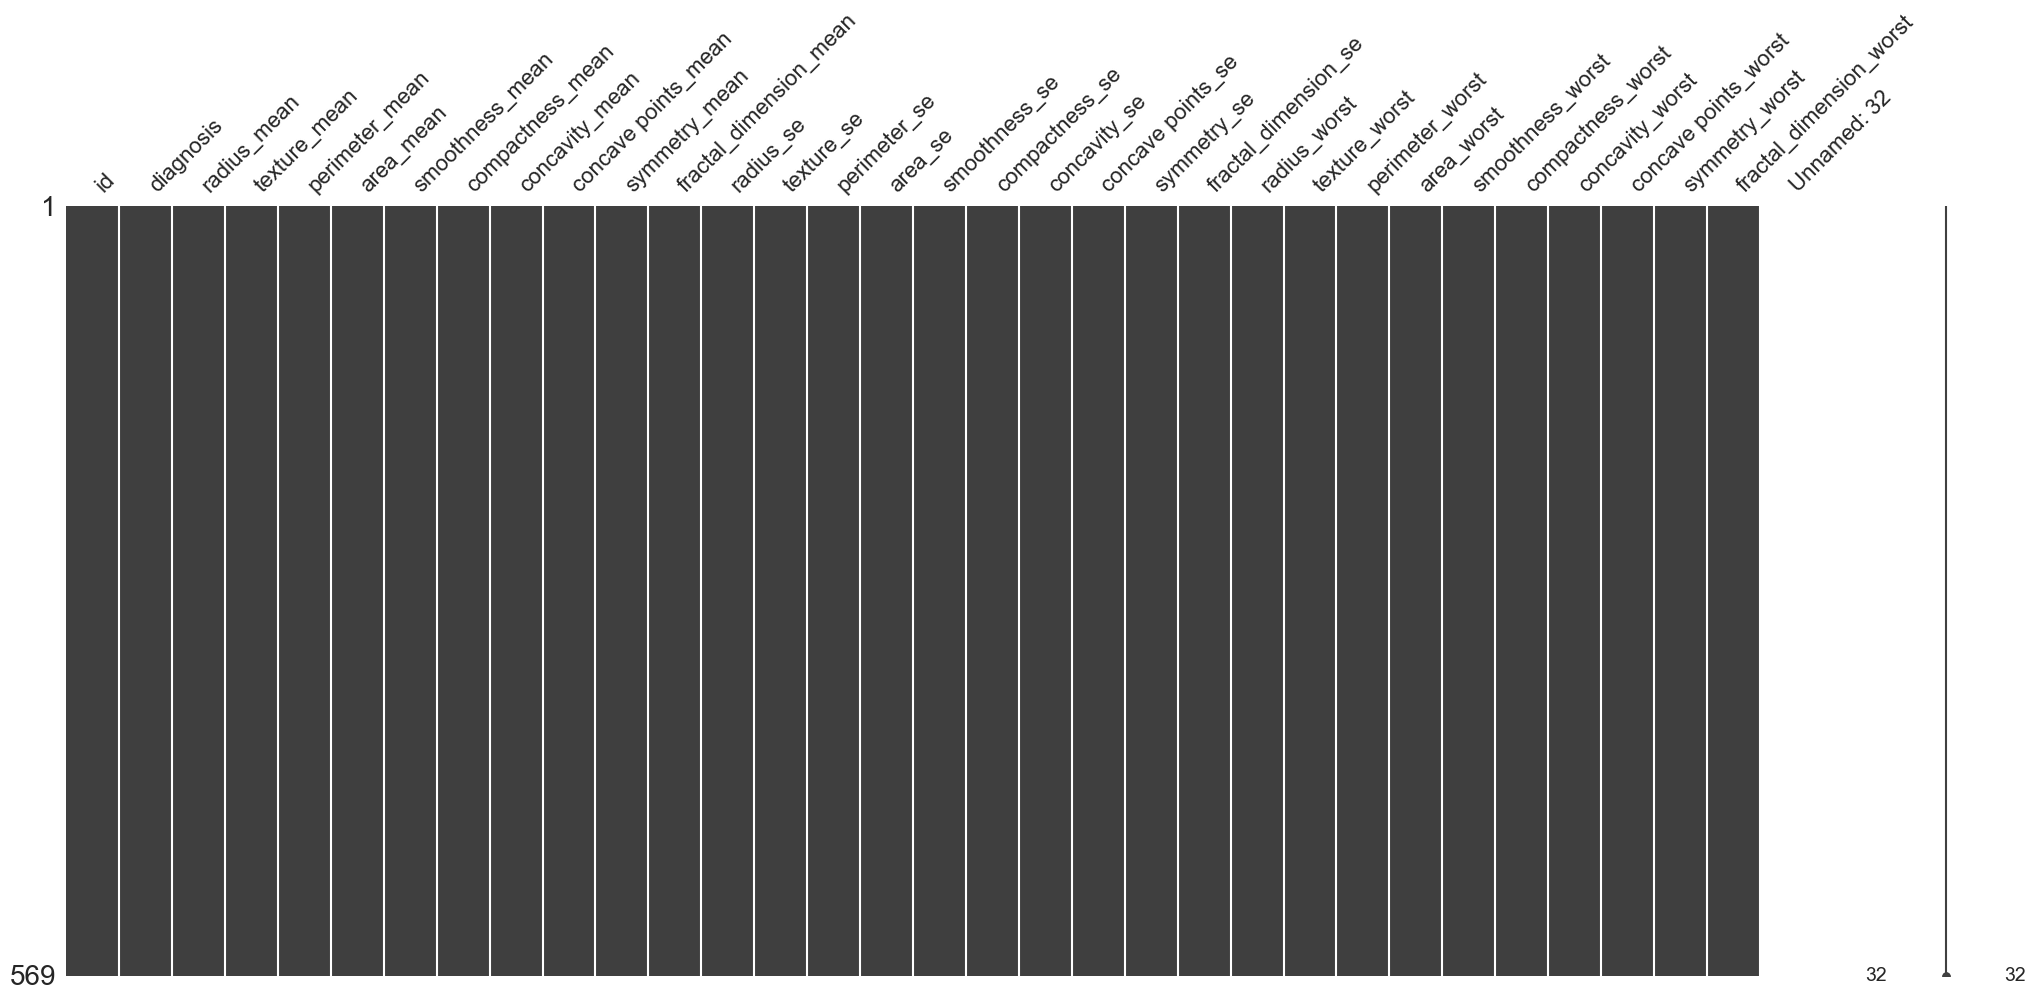

In [50]:
msno.matrix(df)

In [51]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [52]:
df['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [53]:
df['Unnamed: 32'].unique()

array([nan])

In [54]:
# the id column is irrelevant to our analysis
df['id'].nunique()

569

In [55]:
# Drop the unnecessary columns
df = df.drop(["id","Unnamed: 32"],axis = 'columns')
df.shape

(569, 31)

## Label encoding

In [56]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [57]:
encoder = preprocessing.LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [58]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## diagnosis

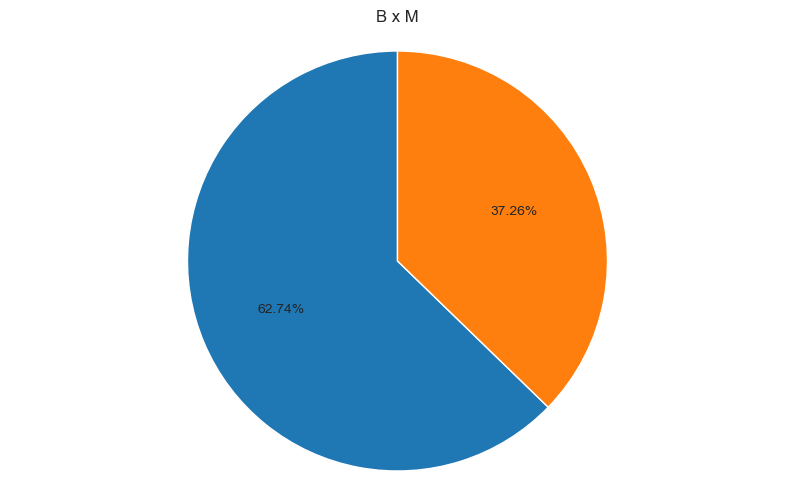

In [59]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.pie(df['diagnosis'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("B x M")
plt.show()

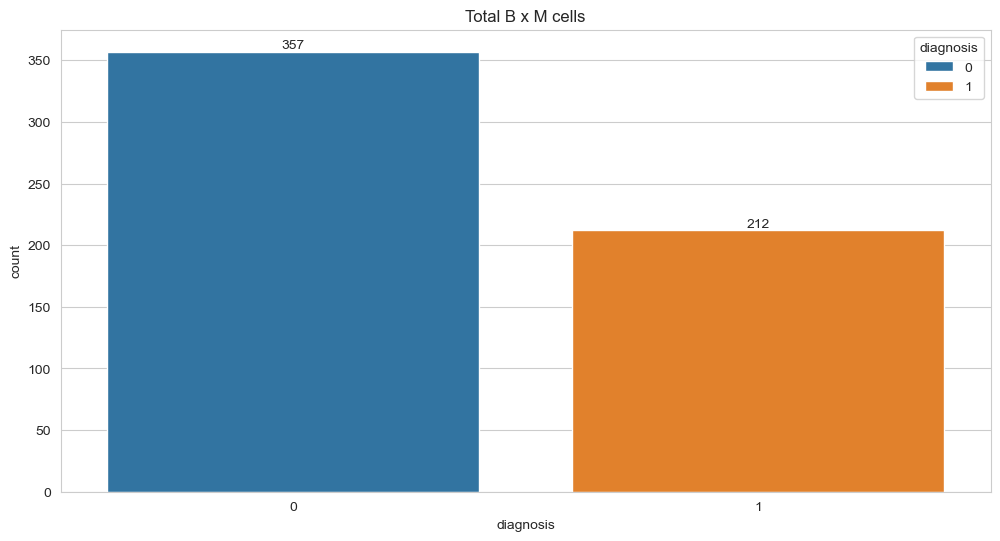

In [83]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='diagnosis', hue='diagnosis')
plt.title('Total B x M cells')

ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.show()

## radius_mean and texture_mean

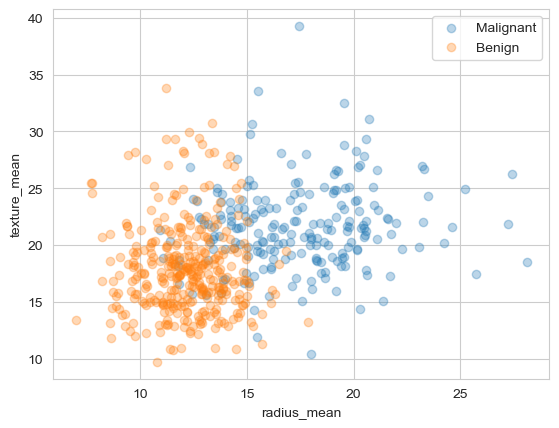

In [61]:
M = df[df.diagnosis == 1] #Diagnosis transfers all values of M to M data
B = df[df.diagnosis == 0] #Diagnosis transfers all values of B to B data

plt.scatter(M.radius_mean,M.texture_mean, label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean,B.texture_mean,label = "Benign", alpha = 0.3)

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.legend()
plt.show()

<Axes: xlabel='radius_mean', ylabel='texture_mean'>

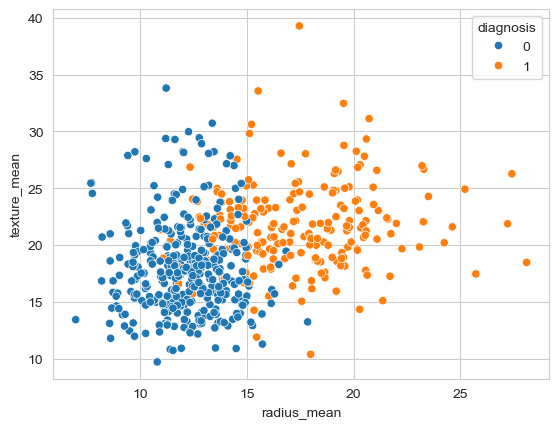

In [62]:
import seaborn as sns
sns.scatterplot(data=df, x="radius_mean", 
                y="texture_mean", hue="diagnosis")

In [63]:
df.groupby('diagnosis')[['radius_mean','texture_mean']].mean()

,radius_mean,texture_mean
diagnosis,,
0,12.146524,17.914762
1,17.462830,21.604906


## Heatmap

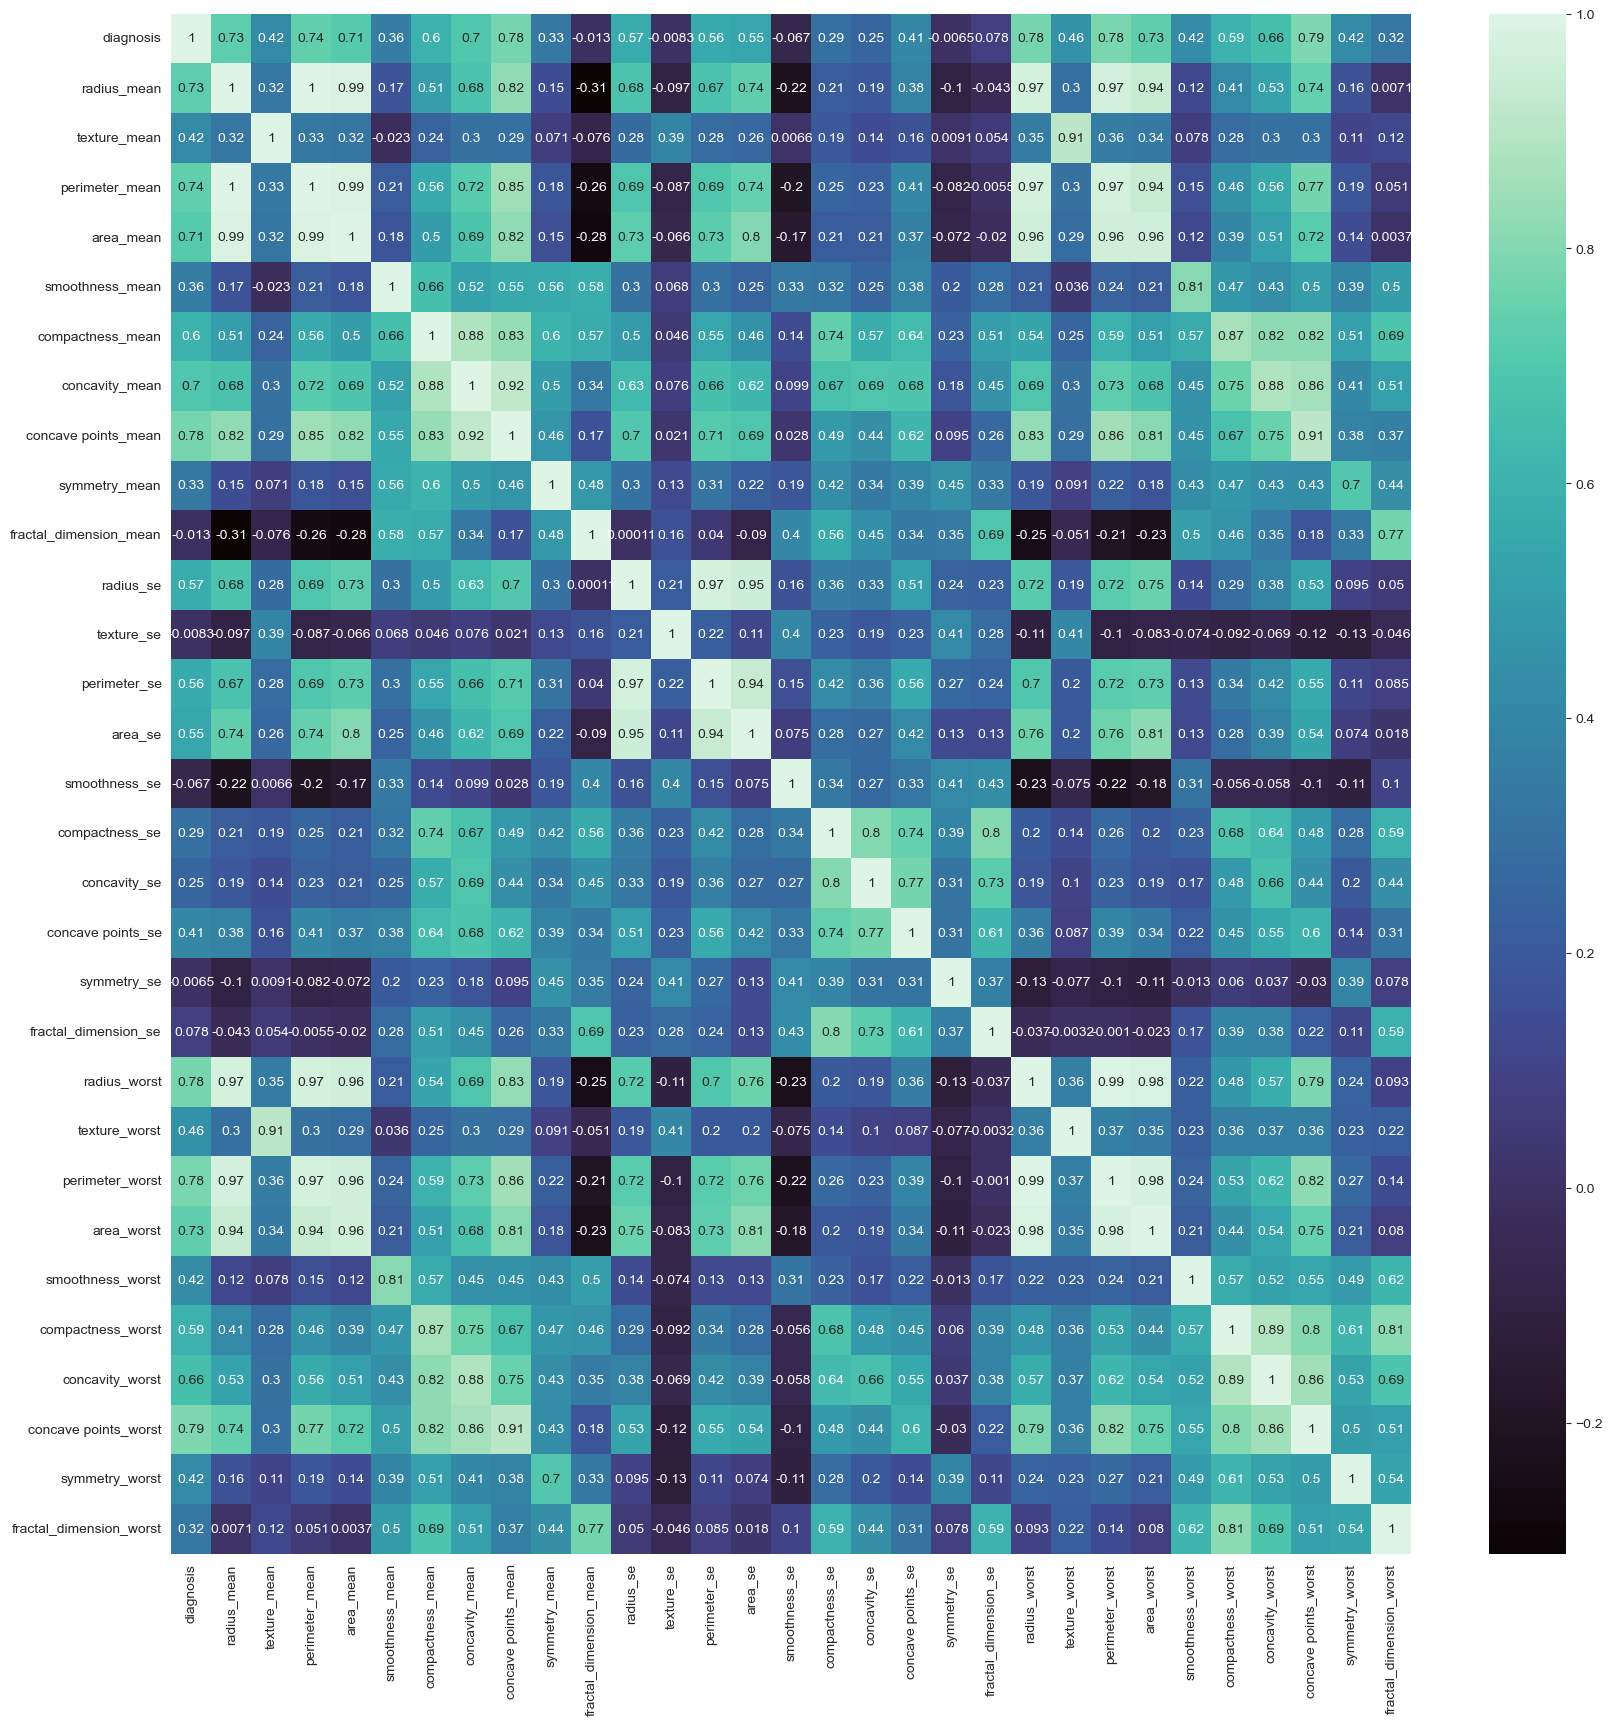

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='mako' )
plt.show()

## Correlation

In [65]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [66]:
df.corrwith(df.diagnosis).sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

# Plot top 8 high correlation features

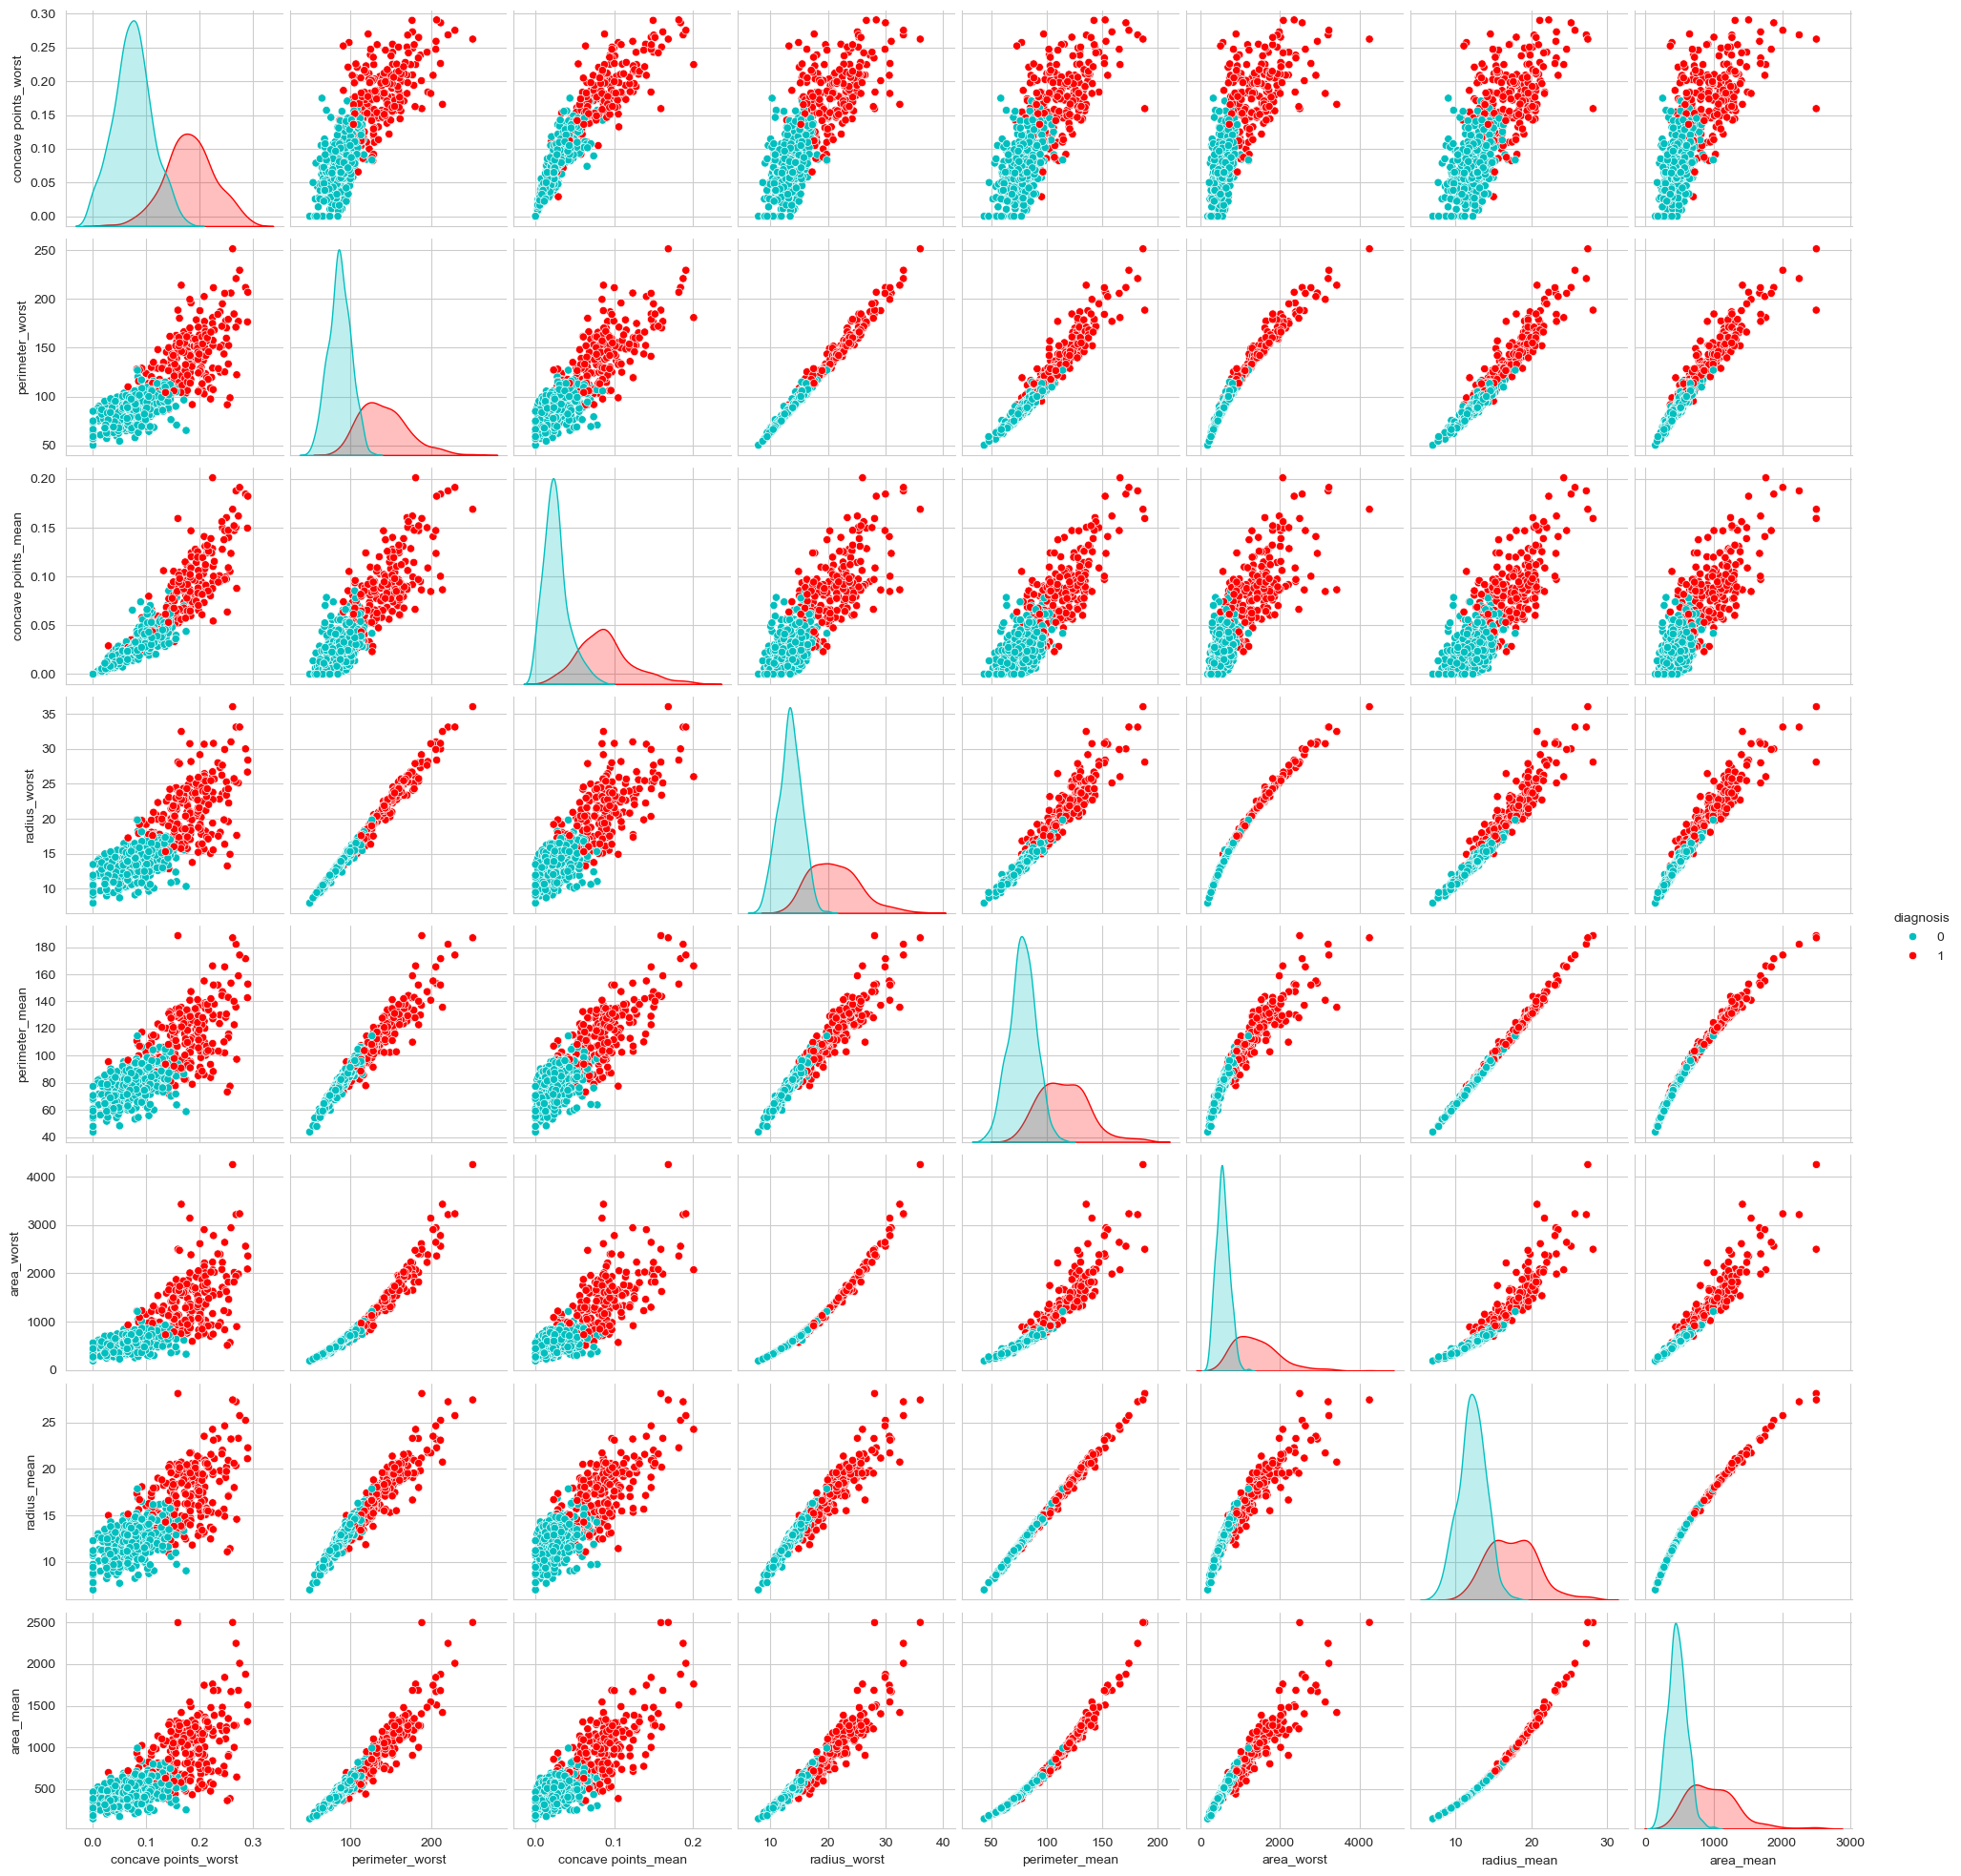

In [67]:
hi_corr_cols = df.corrwith(df.diagnosis).sort_values(ascending=False).index[:9].tolist()
sns.pairplot(df[hi_corr_cols], hue='diagnosis', palette=['c','r'], diag_kind='kde', height=2.5)
plt.show()

## Model building

In [68]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [69]:
X = df.drop("diagnosis", axis=1)
y = df['diagnosis']

In [70]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=43, stratify=y)

In [71]:
model_dict = {}

## Linear Discriminant Analysis

In [72]:
classifer = LinearDiscriminantAnalysis()
predictor = classifer.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_lda = accuracy_score(y_val, y_pred)
model_dict['linear_discriminant_analysis'] = accuracy_lda
print(accuracy_lda)

0.9680851063829787


## Random Forest Classifier

In [73]:
classifier = RandomForestClassifier(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_rfc = accuracy_score(y_val, y_pred)
model_dict['random_forest_classifier'] = accuracy_rfc
print(accuracy_rfc)

0.9627659574468085


## XGboost

In [74]:
classifier = XGBClassifier(random_state=42, eval_metric='logloss')
predictor_xgb = classifier.fit(X_train, y_train)
y_pred = predictor_xgb.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred)
model_dict['xgboost_classifier'] = accuracy_xgb
print(accuracy_xgb)

0.973404255319149


## Model Accuracy Summary

In [75]:
model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy'])
model_accuracies_df['Model'] = model_dict.keys()
model_accuracies_df['Accuracy'] = model_dict.values()
model_accuracies_df

,Model,Accuracy
0,linear_discriminant_analysis,0.968085
1,random_forest_classifier,0.962766
2,xgboost_classifier,0.973404


## Multiple Model testing

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tqdm.notebook import tqdm

In [77]:
X = df.drop("diagnosis", axis=1)
y = df['diagnosis']

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape

((455, 30), (114, 30))

  0%|          | 0/6 [00:00<?, ?it/s]

RandomForestClassifier(random_state=42)
cross_val_score  [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
average  0.9560937742586555
Accuracy_score: 0.9473684210526315
Precission_score: 0.972972972972973
Recall_score: 0.8780487804878049
F1-score: 0.923076923076923


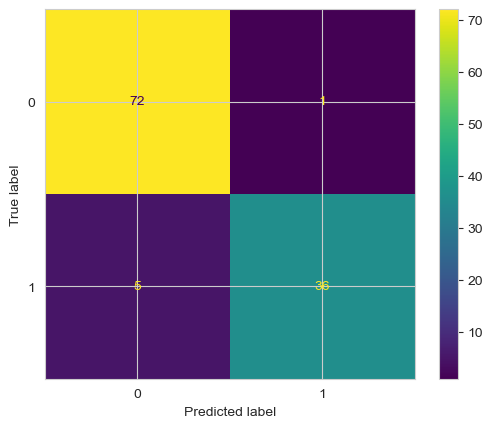

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
BaggingClassifier(random_state=42)
cross_val_score  [0.92982456 0.92982456 0.97368421 0.95614035 0.97345133]
average  0.952585002328831
Accuracy_score: 0.9385964912280702
Precission_score: 0.9473684210526315
Recall_score: 0.8780487804878049
F1-score: 0.9113924050632912


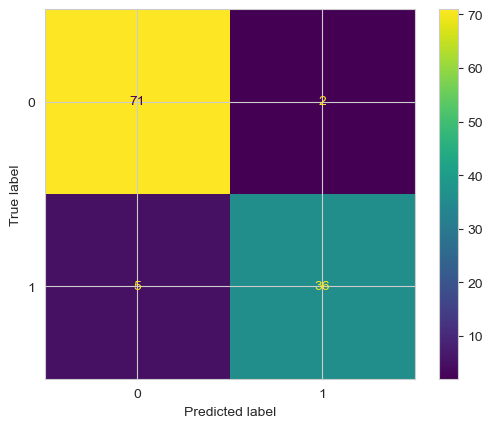

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DecisionTreeClassifier(random_state=42)
cross_val_score  [0.9122807  0.90350877 0.92982456 0.95614035 0.88495575]
average  0.9173420276354604
Accuracy_score: 0.9122807017543859
Precission_score: 0.8974358974358975
Recall_score: 0.8536585365853658
F1-score: 0.875


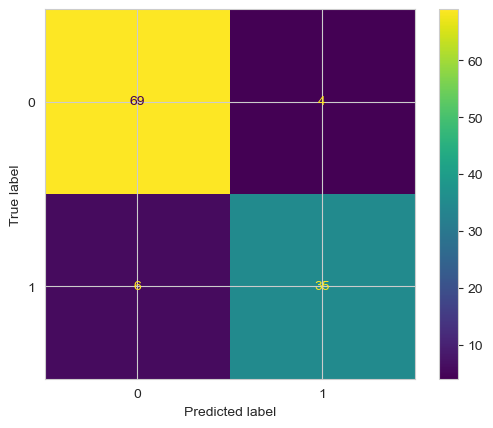

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SVC(random_state=42)
cross_val_score  [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
average  0.9121720229777983
Accuracy_score: 0.9298245614035088
Precission_score: 1.0
Recall_score: 0.8048780487804879
F1-score: 0.8918918918918919


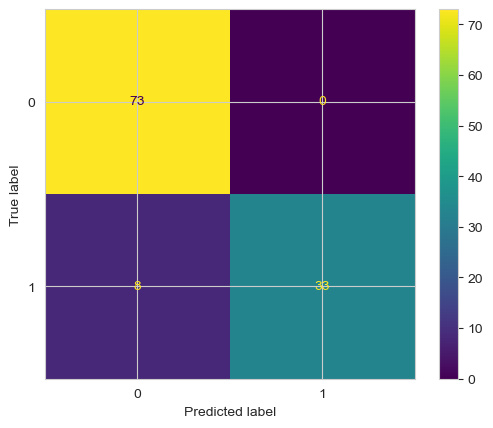

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LinearDiscriminantAnalysis()
cross_val_score  [0.95614035 0.96491228 0.94736842 0.96491228 0.96460177]
average  0.9595870206489675
Accuracy_score: 0.9473684210526315
Precission_score: 0.972972972972973
Recall_score: 0.8780487804878049
F1-score: 0.923076923076923


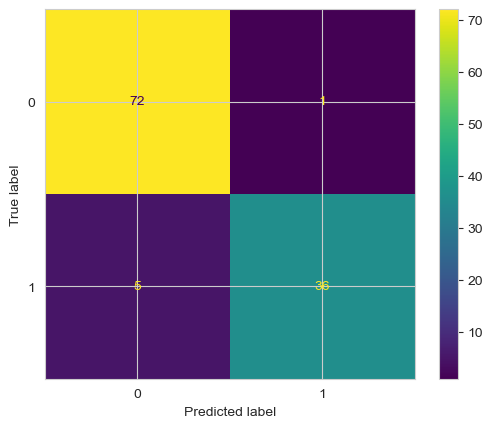

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)
cross_val_score  [0.97368421 0.95614035 1.         0.96491228 0.97345133]
average  0.9736376339077782
Accuracy_score: 0

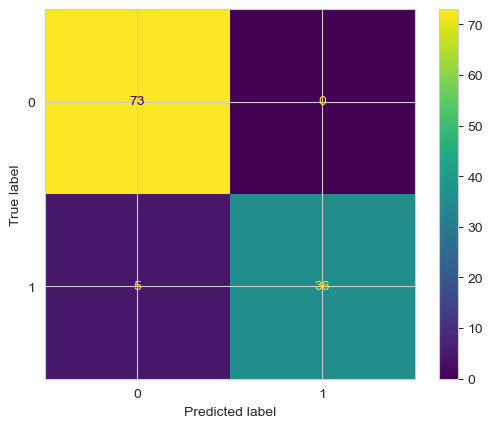

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [79]:
algos = [RandomForestClassifier(random_state=42),
         BaggingClassifier(random_state=42),
         DecisionTreeClassifier(random_state=42),
         SVC(random_state=42),
         #LogisticRegression(), # debug max_iter=100
         LinearDiscriminantAnalysis(),
         XGBClassifier(random_state=42, eval_metric='logloss')
         ]
for algo in tqdm(algos):
    print(str(algo))
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    cs = cross_val_score(algo,X,y)
    print("cross_val_score ",cs)
    print("average ",sum(cs)/len(cs))
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission_score: {precision_score(y_test,y_pred)}')
    print(f'Recall_score: {recall_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    cm = confusion_matrix(y_test, y_pred, labels = algo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = algo.classes_)
    disp.plot()
    plt.show()
    print('~'*100)
